In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_cbg_lsa.csv")

In [3]:
df_knn

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..CBG
0,3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.042471
1,3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.042471
2,7,0.401841,-0.062527,-0.018128,-0.104475,0.009215,1,0,0,0,...,0,1,0,0,0,0,1,1,1,0.042471
3,11,0.260672,-0.019644,0.215790,-0.106098,0.058930,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0.042471
4,13,0.276418,-0.133986,0.116293,0.073694,0.041143,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.042471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.335907
74996,42973,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.335907
74997,42975,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.335907
74998,42975,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.335907


In [4]:
df_knn.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [5]:
X = df_knn.drop(['X..CBG', 'index'], axis = 1)
y = df_knn[['X..CBG']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[0.04247104],
       [0.04247104],
       [0.04247104],
       ...,
       [0.33590734],
       [0.33590734],
       [0.33590734]])

<AxesSubplot:ylabel='Count'>

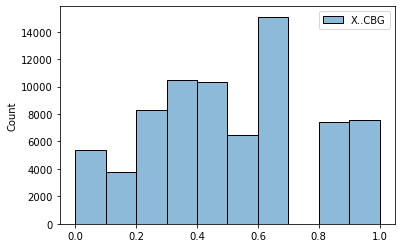

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [11]:
mean_absolute_error(y_val, y_pred_knreg)

0.049776025066310785

In [12]:
mean_squared_error(y_val, y_pred_knreg)

0.010213256427852445

In [13]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.10106065717108931

In [14]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9143773020686529

In [15]:
#val
r2_score(y_val, y_pred_knreg)

0.8585792835153306

Residual plots for each target variable

Feature Selection

In [16]:
rfreg = RandomForestRegressor()

In [17]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [18]:
selector.estimator_.feature_importances_

array([8.54797413e-02, 5.18788074e-02, 4.58156609e-02, 7.53430309e-02,
       4.47504745e-02, 1.07314440e-02, 8.61553979e-02, 4.03780800e-02,
       9.06621743e-05, 8.86863848e-04, 3.03413842e-03, 0.00000000e+00,
       4.09548908e-03, 8.80187714e-05, 1.35282284e-03, 2.63649816e-03,
       4.66858261e-03, 3.01418393e-03, 0.00000000e+00, 3.78772775e-03,
       0.00000000e+00, 0.00000000e+00, 1.01755484e-02, 3.52842104e-03,
       4.32426736e-03, 1.04296684e-03, 5.33926749e-03, 8.12722324e-05,
       0.00000000e+00, 2.48831643e-03, 6.27374810e-03, 0.00000000e+00,
       3.60467910e-03, 4.21255963e-06, 0.00000000e+00, 3.98998876e-03,
       2.63688801e-03, 5.72314043e-03, 2.54393909e-04, 1.99757982e-04,
       1.25555789e-03, 2.07381878e-01, 1.29598775e-03, 2.34794164e-02,
       1.38153739e-04, 8.50229888e-03, 1.10402284e-03, 6.26911734e-05,
       7.23815315e-03, 3.17936252e-04, 1.29009751e-02, 5.98539014e-03,
       2.47140801e-03, 1.53284575e-03, 1.40206814e-02, 3.95432214e-03,
      

In [19]:
selector.threshold_

0.01162790697674419

In [20]:
mask = selector.get_support()

In [21]:
mask

array([ True,  True,  True,  True,  True, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False])

In [22]:
selected_features = X.columns[mask]

In [23]:
selected_X = df_knn[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,indica,sativa,berry,blueberry,diesel,grape,lemon,strawberry
0,0.243491,0.034313,0.080290,-0.165609,0.019773,0,0,0,0,0,1,0,0
1,0.243491,0.034313,0.080290,-0.165609,0.019773,0,0,0,0,0,1,0,0
2,0.401841,-0.062527,-0.018128,-0.104475,0.009215,0,0,0,0,0,0,0,0
3,0.260672,-0.019644,0.215790,-0.106098,0.058930,0,0,0,0,0,0,0,0
4,0.276418,-0.133986,0.116293,0.073694,0.041143,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.181714,-0.045560,-0.055692,0.015649,-0.045585,1,0,0,0,0,0,0,0
74996,0.055494,0.003622,-0.050252,-0.024795,-0.031141,1,0,0,0,0,0,0,0
74997,0.324915,0.131823,-0.099424,0.065491,0.038437,1,0,0,0,0,0,0,0
74998,0.324915,0.131823,-0.099424,0.065491,0.038437,1,0,0,0,0,0,0,0


In [24]:
selected_X.columns.to_list()

['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'indica',
 'sativa',
 'berry',
 'blueberry',
 'diesel',
 'grape',
 'lemon',
 'strawberry']

In [25]:
import joblib

joblib.dump(selected_X, "selected_X_knn_lsa_elbow_cbg.pkl")
joblib.dump(selector, "selector_knn_lsa_elbow_cbg.pkl")

['selector_knn_lsa_elbow_cbg.pkl']

Train test split (after Feature Selection)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [27]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [28]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [29]:
mean_absolute_error(y_val, y_pred_knreg)

0.05283318980747552

In [30]:
mean_squared_error(y_val, y_pred_knreg)

0.011038941575443995

In [31]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.10506636748000758

In [32]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9084335636815074

In [33]:
#val
r2_score(y_val, y_pred_knreg)

0.8467344385600766

Hyperparameter Tuning

In [34]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [35]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [36]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [37]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 9}

kNN (after hyperparameter tuning)

In [54]:
knreg_ht = KNeighborsRegressor(n_neighbors = 9, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [55]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.021071651017186884

In [56]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.07413605593508829

In [57]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9901923357133051

In [58]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.923690940491593

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [59]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [60]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_lsa_elbow_cbg.pkl")
joblib.dump(y_test, "y_test_knreg_lsa_elbow_cbg.pkl")

['y_test_knreg_lsa_elbow_cbg.pkl']

In [61]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.02135623328668176

In [62]:
mean_squared_error(y_test, y_pred_knreg_test)

0.005692721155221075

In [63]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.07545012362628092

In [64]:
r2_score(y_test, y_pred_knreg_test)

0.9216893922072135

In [65]:
y_test

,X..CBG
11591,0.826255
52020,0.409266
34666,0.262548
22169,0.393822
23049,0.530245
...,...
60863,0.606178
32316,0.532819
60933,0.606178
43206,1.000000


In [66]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

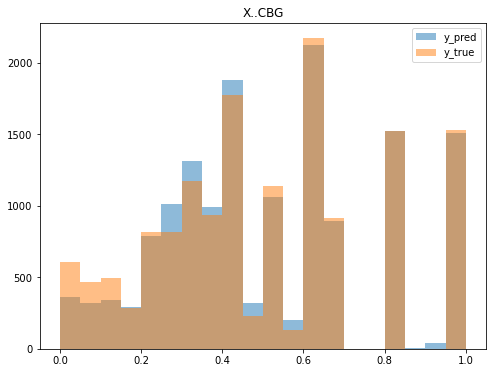

<Figure size 432x288 with 0 Axes>

In [67]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..CBG"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_lsa_elbow_cbg.png')

Pearson R

In [68]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.961
P-value: 0.000


<AxesSubplot:>

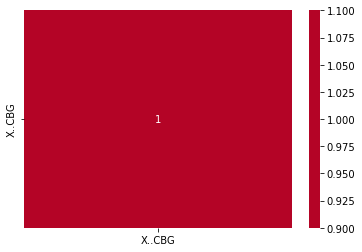

In [69]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)